In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import cartopy as cp
import cartopy.crs as ccrs

## Import both JMA and BGC datasets

In [2]:
# import the data

bgc = pd.read_csv('C:/Users/nicol/OEAS_895/datasets/kuro_BGCargo_NO3.csv')
print(bgc.columns)

jma = pd.read_csv('C:/Users/nicol/OEAS_895/datasets/jma_nitrate.csv')
print(jma.columns)

Index(['Date/GMT', 'Days since 1/1/1900', 'NITRATE[uMOL/KG]', 'DEPTH[M]',
       'PRESSURE[DBAR]', 'NA', 'SALINITY[PSS]', 'TEMPERATURE[C]',
       'SIGMATHETA[KG/M3]', 'OXYGEN[uMOL/KG]', 'OXYGENSAT', 'LON', 'LAT'],
      dtype='object')
Index(['Unnamed: 0', 'theta', 'sal', 'depth', 'nitrate', 'lon', 'lat', 'date',
       'year', 'month', 'day', 'profile', 'cruise', 'vessel', 'density'],
      dtype='object')


## Creating surface subsets of the data

In [3]:
# creating subsets for JMA dataset to remove the -999/NaNs for just the SURFACE samples <10

subset = jma[(jma.nitrate>=0) & (jma.depth<10)]

# creating subsets for BGC dataset to just look at the SURFACE samples <10

subset2 = bgc[(bgc['DEPTH[M]']<10)]

# Plot both JMA and BGC surface data on a map

C:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
C:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:475: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


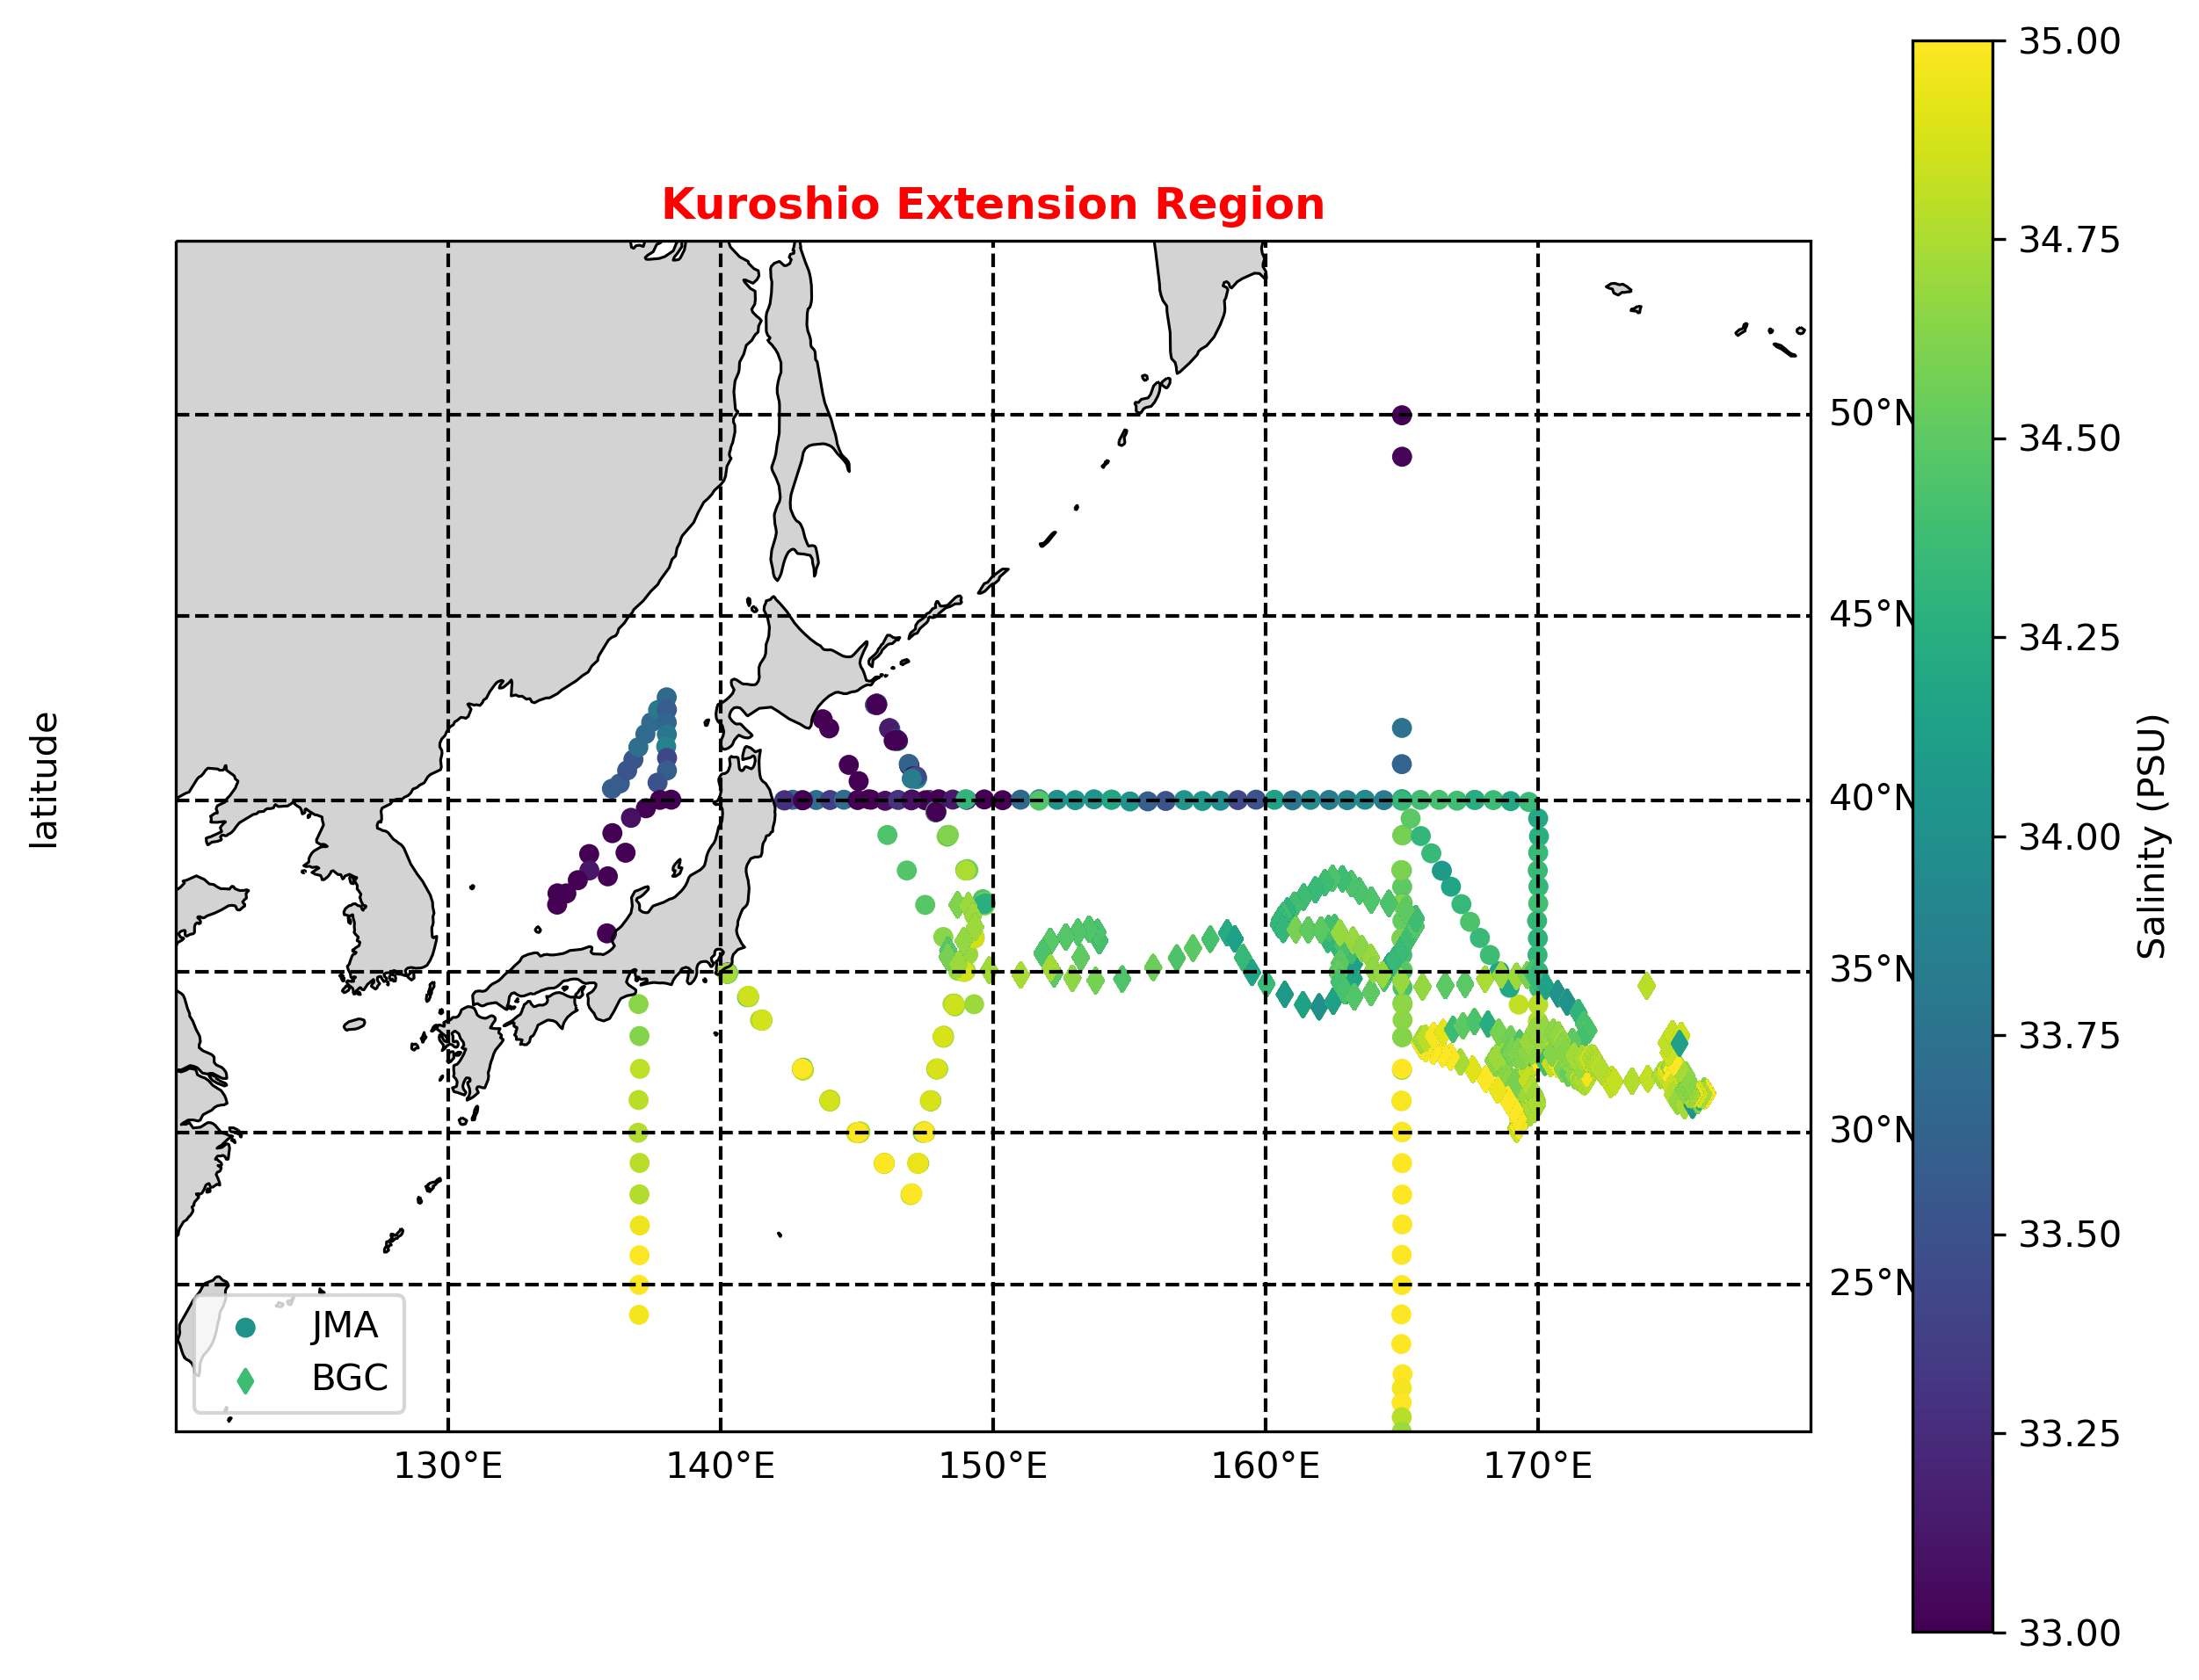

In [55]:
# create a regional map with parallels and meridians

fig = plt.figure(figsize = (10,8), dpi = 300)

ax = fig.add_subplot(1,1,1, projection = ccrs.Mercator(central_longitude = 0, min_latitude = 20, max_latitude = 55))

# (east, west, south, north) in terms of °E and °N
ax.set_extent([120, 180, 20, 50])

ax.coastlines(linewidth = 0.75, color = 'k')

ax.set_title('Kuroshio Extension Region', color = 'r', weight = 'bold')

# add lines of latitude 
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, linewidth = 1, color = 'k', linestyle = '--')
gl.xlabels_top = False
gl.ylabels_left = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

gl.ylocator = mticker.FixedLocator([20, 25, 30, 35, 40, 45, 50, 55])

ax.add_feature(cp.feature.LAND, facecolor = 'lightgrey')

# if you want to add text axes labels
ax.text(-0.07, 0.55, 'latitude', va = 'bottom', ha = 'center', rotation = 'vertical', rotation_mode = 'anchor', transform = ax.transAxes)

nn = ax.scatter(subset.lon, subset.lat, s = 20, c = subset.sal, marker = 'o', label = 'JMA', transform = ccrs.PlateCarree(), vmin=33, vmax=35)
nn = ax.scatter(subset2.LON, subset2.LAT, s = 20, c = bgc['SALINITY[PSS]'], marker = 'd', label = 'BGC', transform = ccrs.PlateCarree(), vmin=33, vmax=35)

cb = plt.colorbar(nn)
cb.set_label('Salinity (PSU)')
plt.legend(loc='lower left', fontsize = "medium")



The JMA dataset covers a wider geographical area, but the marginal sea, Sea of Japan, looks like it is a completely different water mass and properties so it might hinder the model for the BGC dataset which is much more open ocean.

## property-property plots for all of the JMA dataset

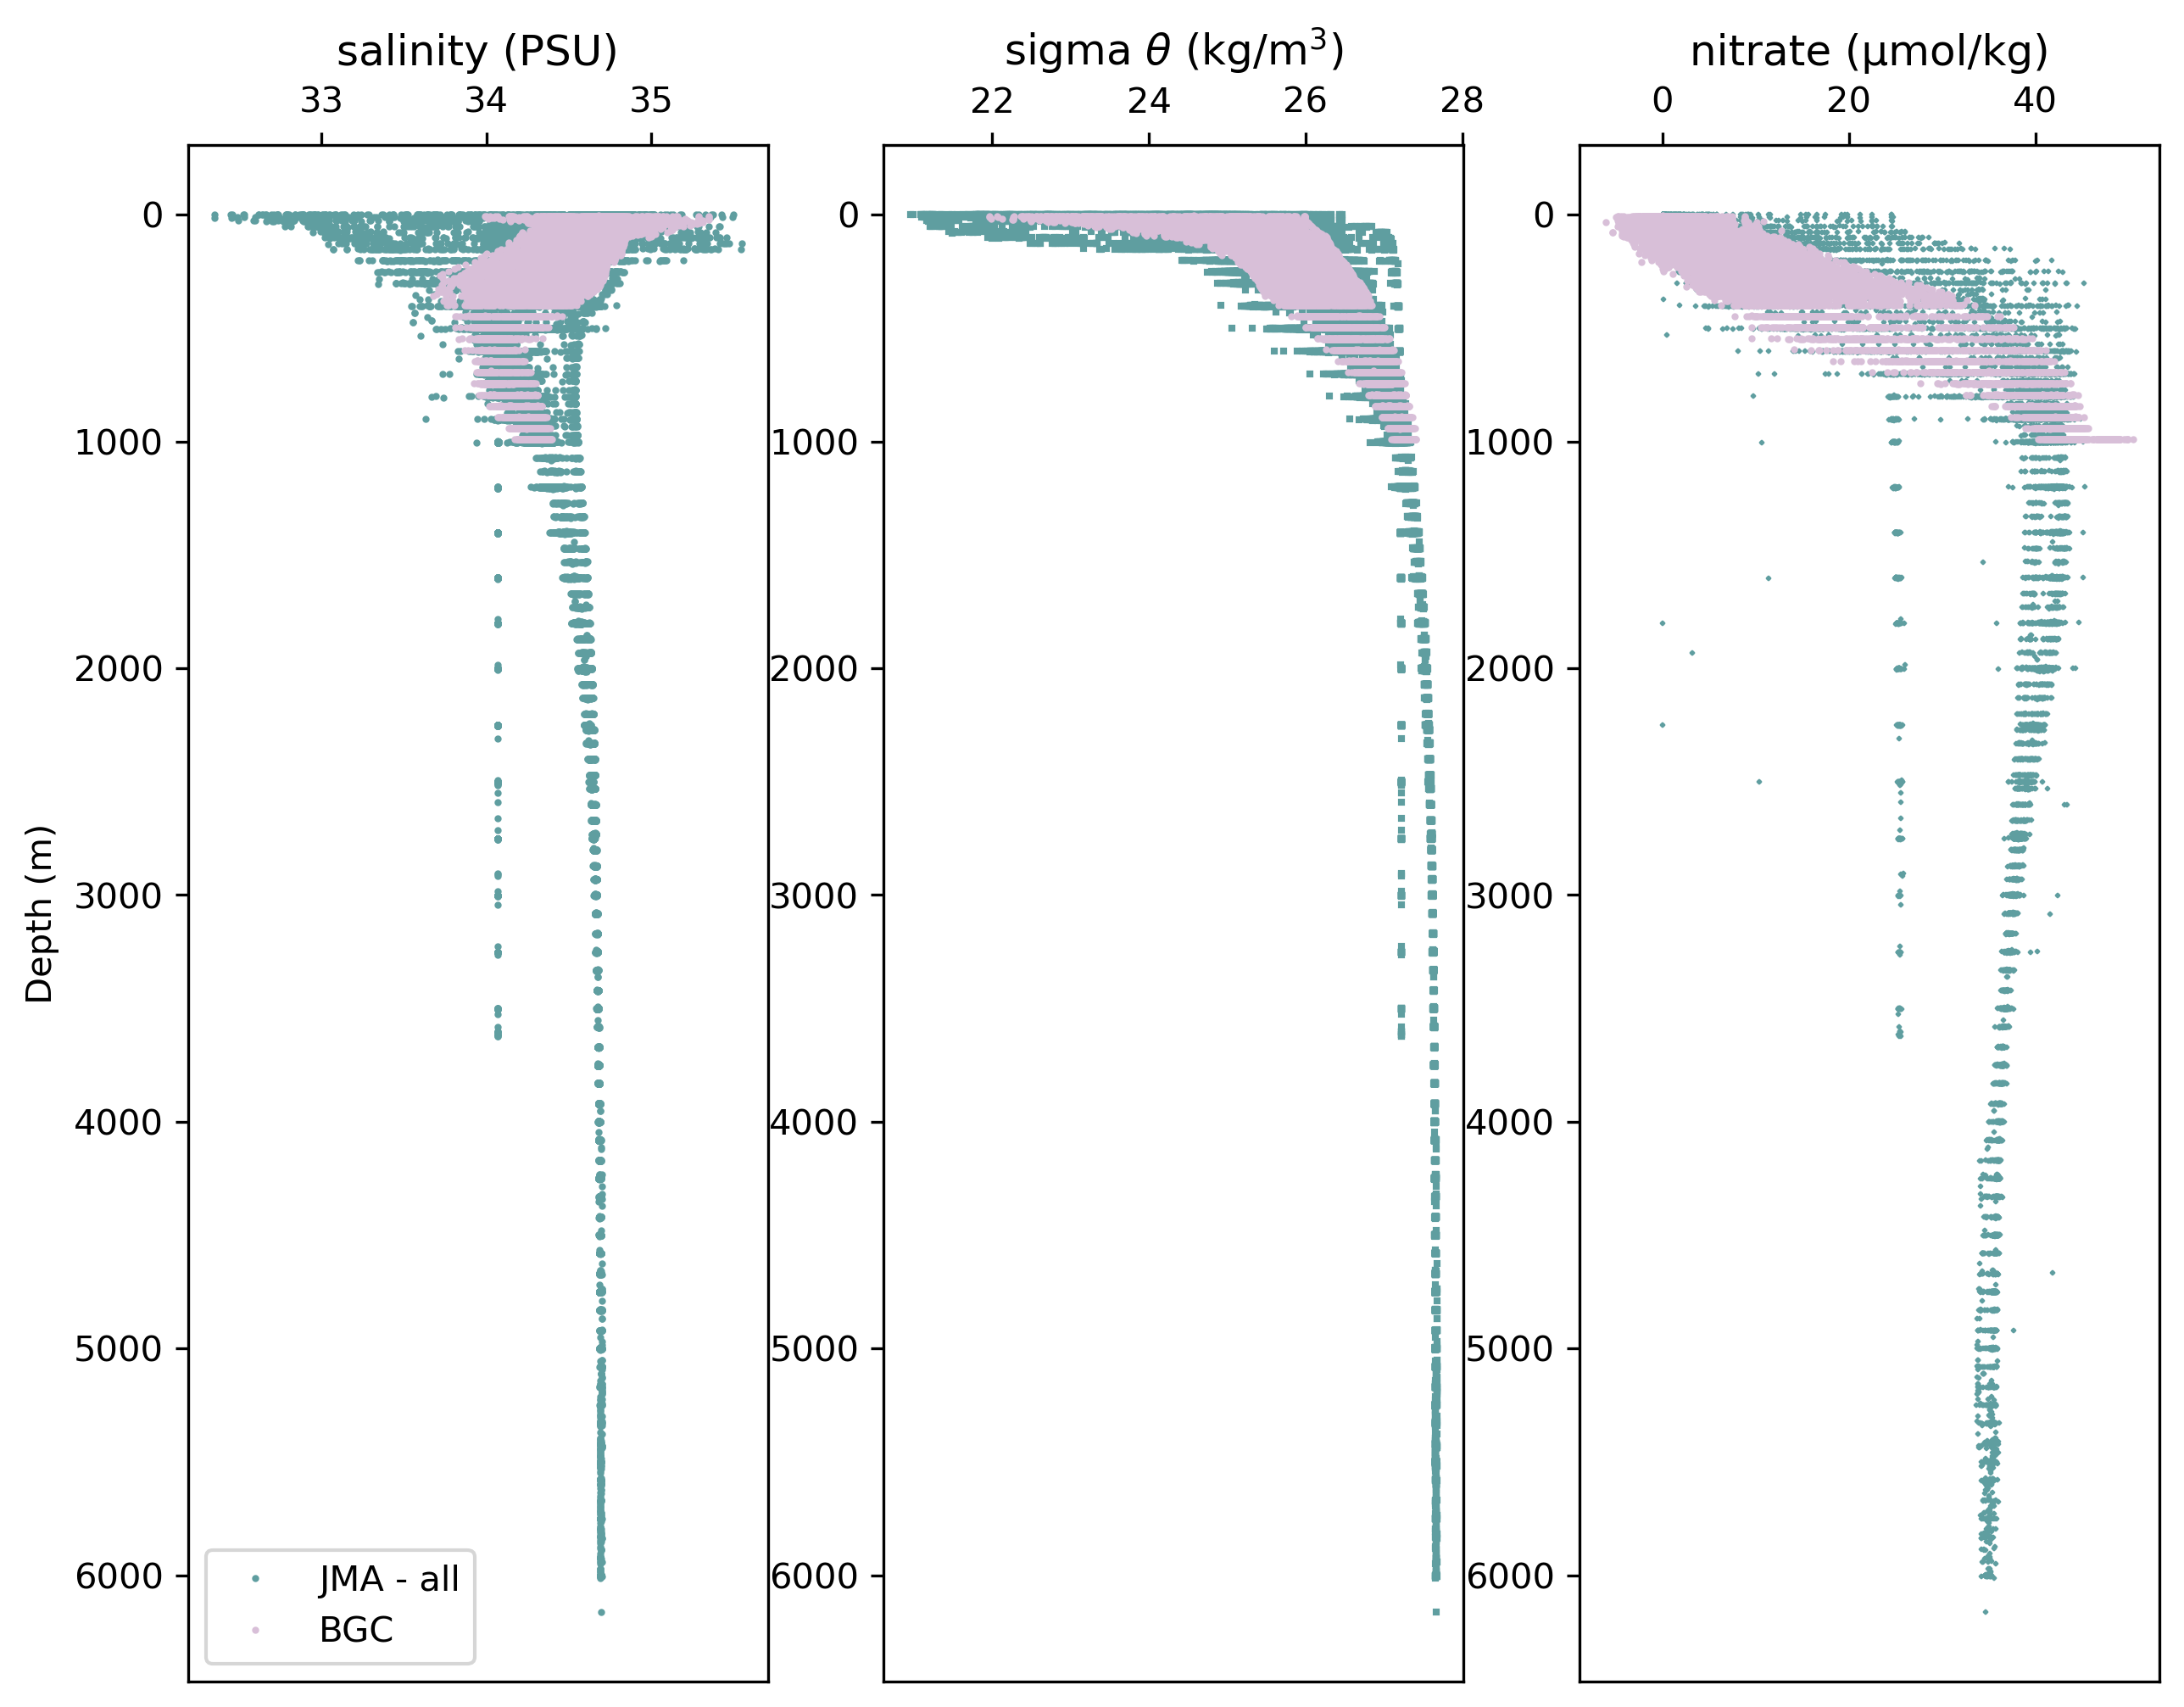

In [15]:
# propoerty-property plots for full water column

new_sub = jma[(jma.nitrate>=0)]

fig = plt.figure(figsize = (10,8), dpi = 300)

plt.subplot(1,3,1)
plt.plot(new_sub.sal, new_sub.depth, 'o', c = 'cadetblue', label = 'JMA - all', markersize = 1)
plt.plot(bgc['SALINITY[PSS]'], abs(bgc['DEPTH[M]']), 'o', c = 'thistle', label = 'BGC', markersize = 1)
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.title(r'salinity (PSU)')
plt.legend(loc='lower left', fontsize = "medium")

plt.subplot(1,3,2)
plt.plot(new_sub.density, new_sub.depth, 's', c = 'cadetblue', markersize = 1)
plt.plot(bgc['SIGMATHETA[KG/M3]'], abs(bgc['DEPTH[M]']), 'o', c = 'thistle', markersize = 1)
plt.gca().invert_yaxis()
plt.title(r'sigma $\theta$ (kg/m$^{3}$)')
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

plt.subplot(1,3,3)
plt.plot(new_sub.nitrate, new_sub.depth, 'x', c = 'cadetblue', markersize = 1)
plt.plot(bgc['NITRATE[uMOL/KG]'], abs(bgc['DEPTH[M]']), 'o', c = 'thistle', markersize = 1)
plt.gca().invert_yaxis()
plt.title(r'nitrate (µmol/kg)')
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)

## highlight the marginal sea, Sea of Japan, in those property plots

In [20]:
# selects only the data in the Sea of Japan
SoJ = jma[(jma.nitrate>=0) & (jma.lon.between(130, 140)) & (jma.lat.between(35,45))]



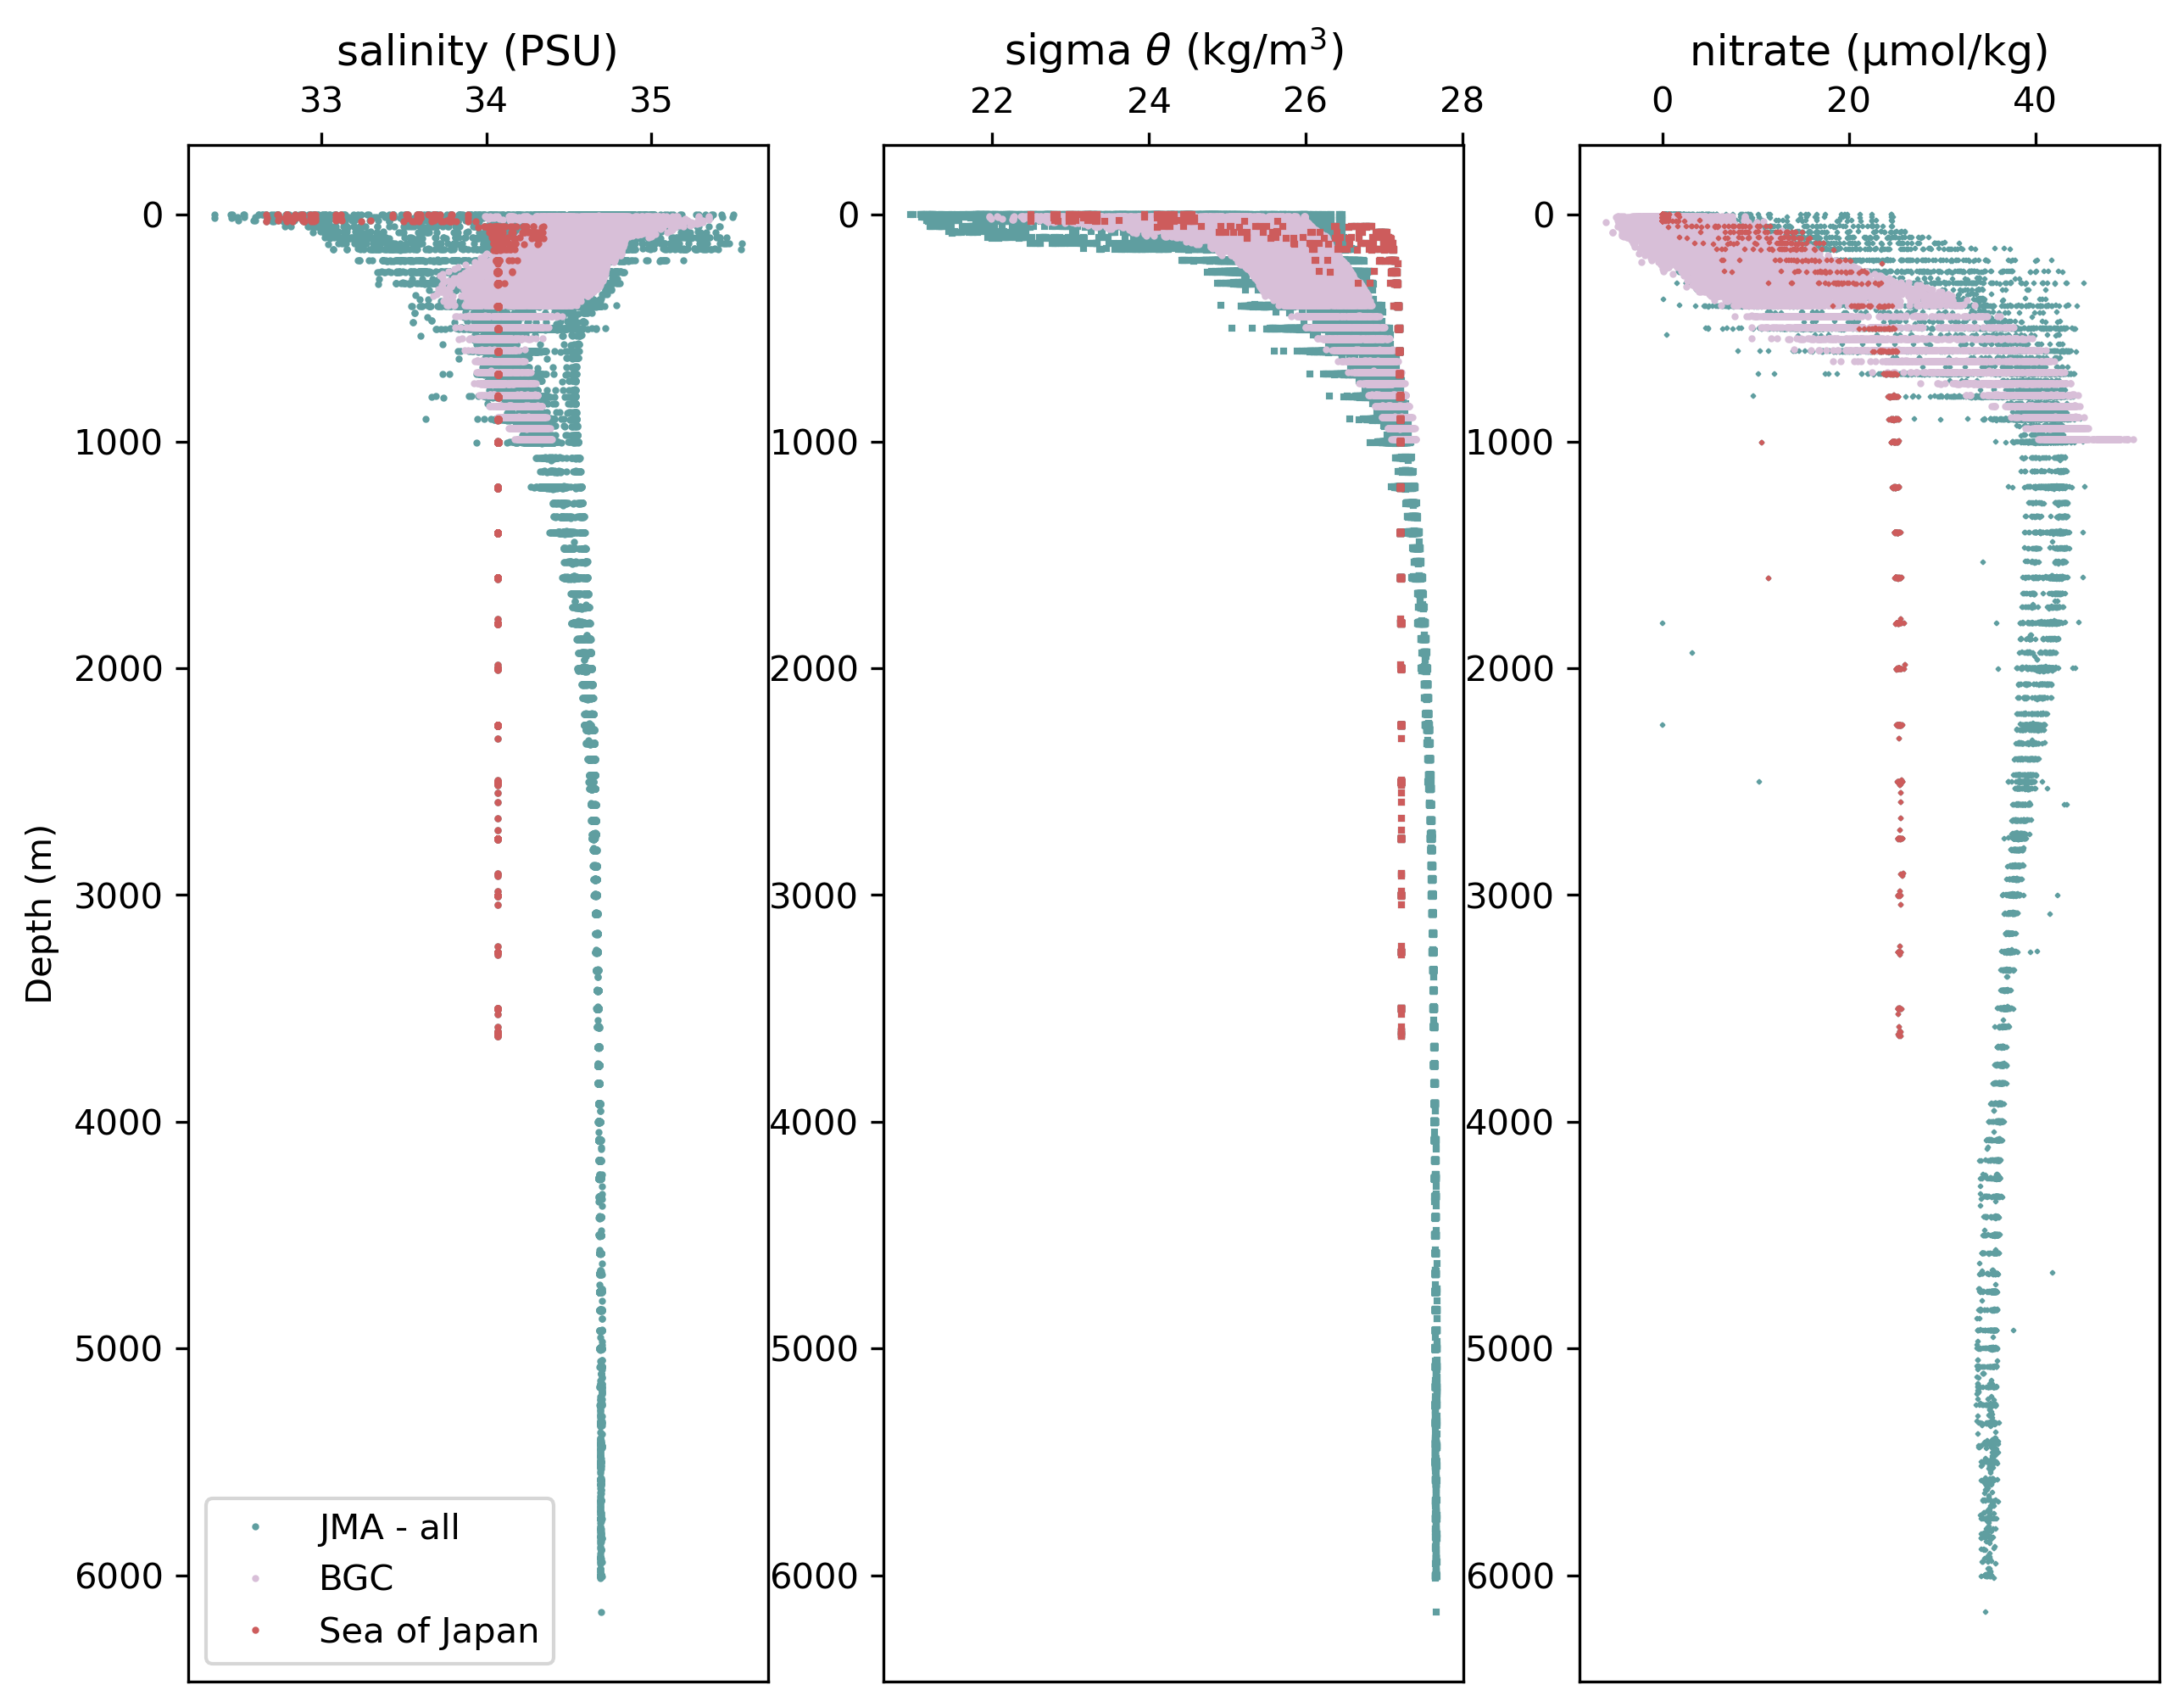

In [23]:
fig = plt.figure(figsize = (10,8), dpi = 300)


plt.subplot(1,3,1)
plt.plot(new_sub.sal, new_sub.depth, 'o', c = 'cadetblue', label = 'JMA - all', markersize = 1)
plt.plot(bgc['SALINITY[PSS]'], abs(bgc['DEPTH[M]']), 'o', c = 'thistle', label = 'BGC', markersize = 1)
plt.plot(SoJ.sal, SoJ.depth, 'o', c = 'indianred', label = 'Sea of Japan', markersize = 1)
plt.gca().invert_yaxis()
plt.ylabel('Depth (m)')
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
plt.title(r'salinity (PSU)')
plt.legend(loc='lower left', fontsize = "medium")


plt.subplot(1,3,2)
plt.plot(new_sub.density, new_sub.depth, 's', c = 'cadetblue', markersize = 1)
plt.plot(bgc['SIGMATHETA[KG/M3]'], abs(bgc['DEPTH[M]']), 'o', c = 'thistle', markersize = 1)
plt.plot(SoJ.density, SoJ.depth, 's', c = 'indianred', markersize = 1)
plt.gca().invert_yaxis()
plt.title(r'sigma $\theta$ (kg/m$^{3}$)')
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)


plt.subplot(1,3,3)
plt.plot(new_sub.nitrate, new_sub.depth, 'x', c = 'cadetblue', markersize = 1)
plt.plot(bgc['NITRATE[uMOL/KG]'], abs(bgc['DEPTH[M]']), 'o', c = 'thistle', markersize = 1)
plt.plot(SoJ.nitrate, SoJ.depth, 'x', c = 'indianred', markersize = 1)
plt.gca().invert_yaxis()
plt.title(r'nitrate (µmol/kg)')
plt.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)



* Based on the above property-property plot, it would make sense to remove the marginal sea from the JMA dataset that will be used to model the BGC data. This is because the Sea of Japan has clear, obvious features/outliers in the JMA dataset. This geographical feature likely sets it apart from the BGC data which is more open ocean. 
* The only other slice done to the data will be to focus the model on the upper 1000m of the JMA dataset to match the depth range of the BGC argo float (which is 1000m).


# New surface map of only the geographical regions applied in the model.

## ie. from here on, we IGNORE the marginal sea, Sea of Japan AND everything deeper than 1000m in the JMA dataset

In [18]:
# This subset is created to ignore the marginal sea (Sea of Japan) and focusing the model on the upper 1000m since the BGC float data only covers the upper 1000m

# selects between 140 and 180°E to encapsulate most of the data desired
jma_sub_lon = jma[(jma.nitrate>=0) & (jma.lon.between(140, 180)) & (jma.lat.between(25,55))]


# selects the data south of 35°N and west of 140°W so that it ignores the data in the Sea of Japan just north of that section
jma_sub_s_lat = jma[(jma.nitrate>=0) & (jma.lon.between(130,140)) & (jma.lat.between(20,35))]


# merge two subsets
jma_sub_ocean = pd.concat([jma_sub_lon, jma_sub_s_lat])


# bin this new subset to upper 1000m
jma_sub_ocean_1000 = jma_sub_ocean[(jma_sub_ocean.depth<=1000)]

# new surface sub...only to make surface map
# bin this new subset to upper 10m
jma_sub_ocean_10 = jma_sub_ocean[(jma_sub_ocean.depth<=10)]


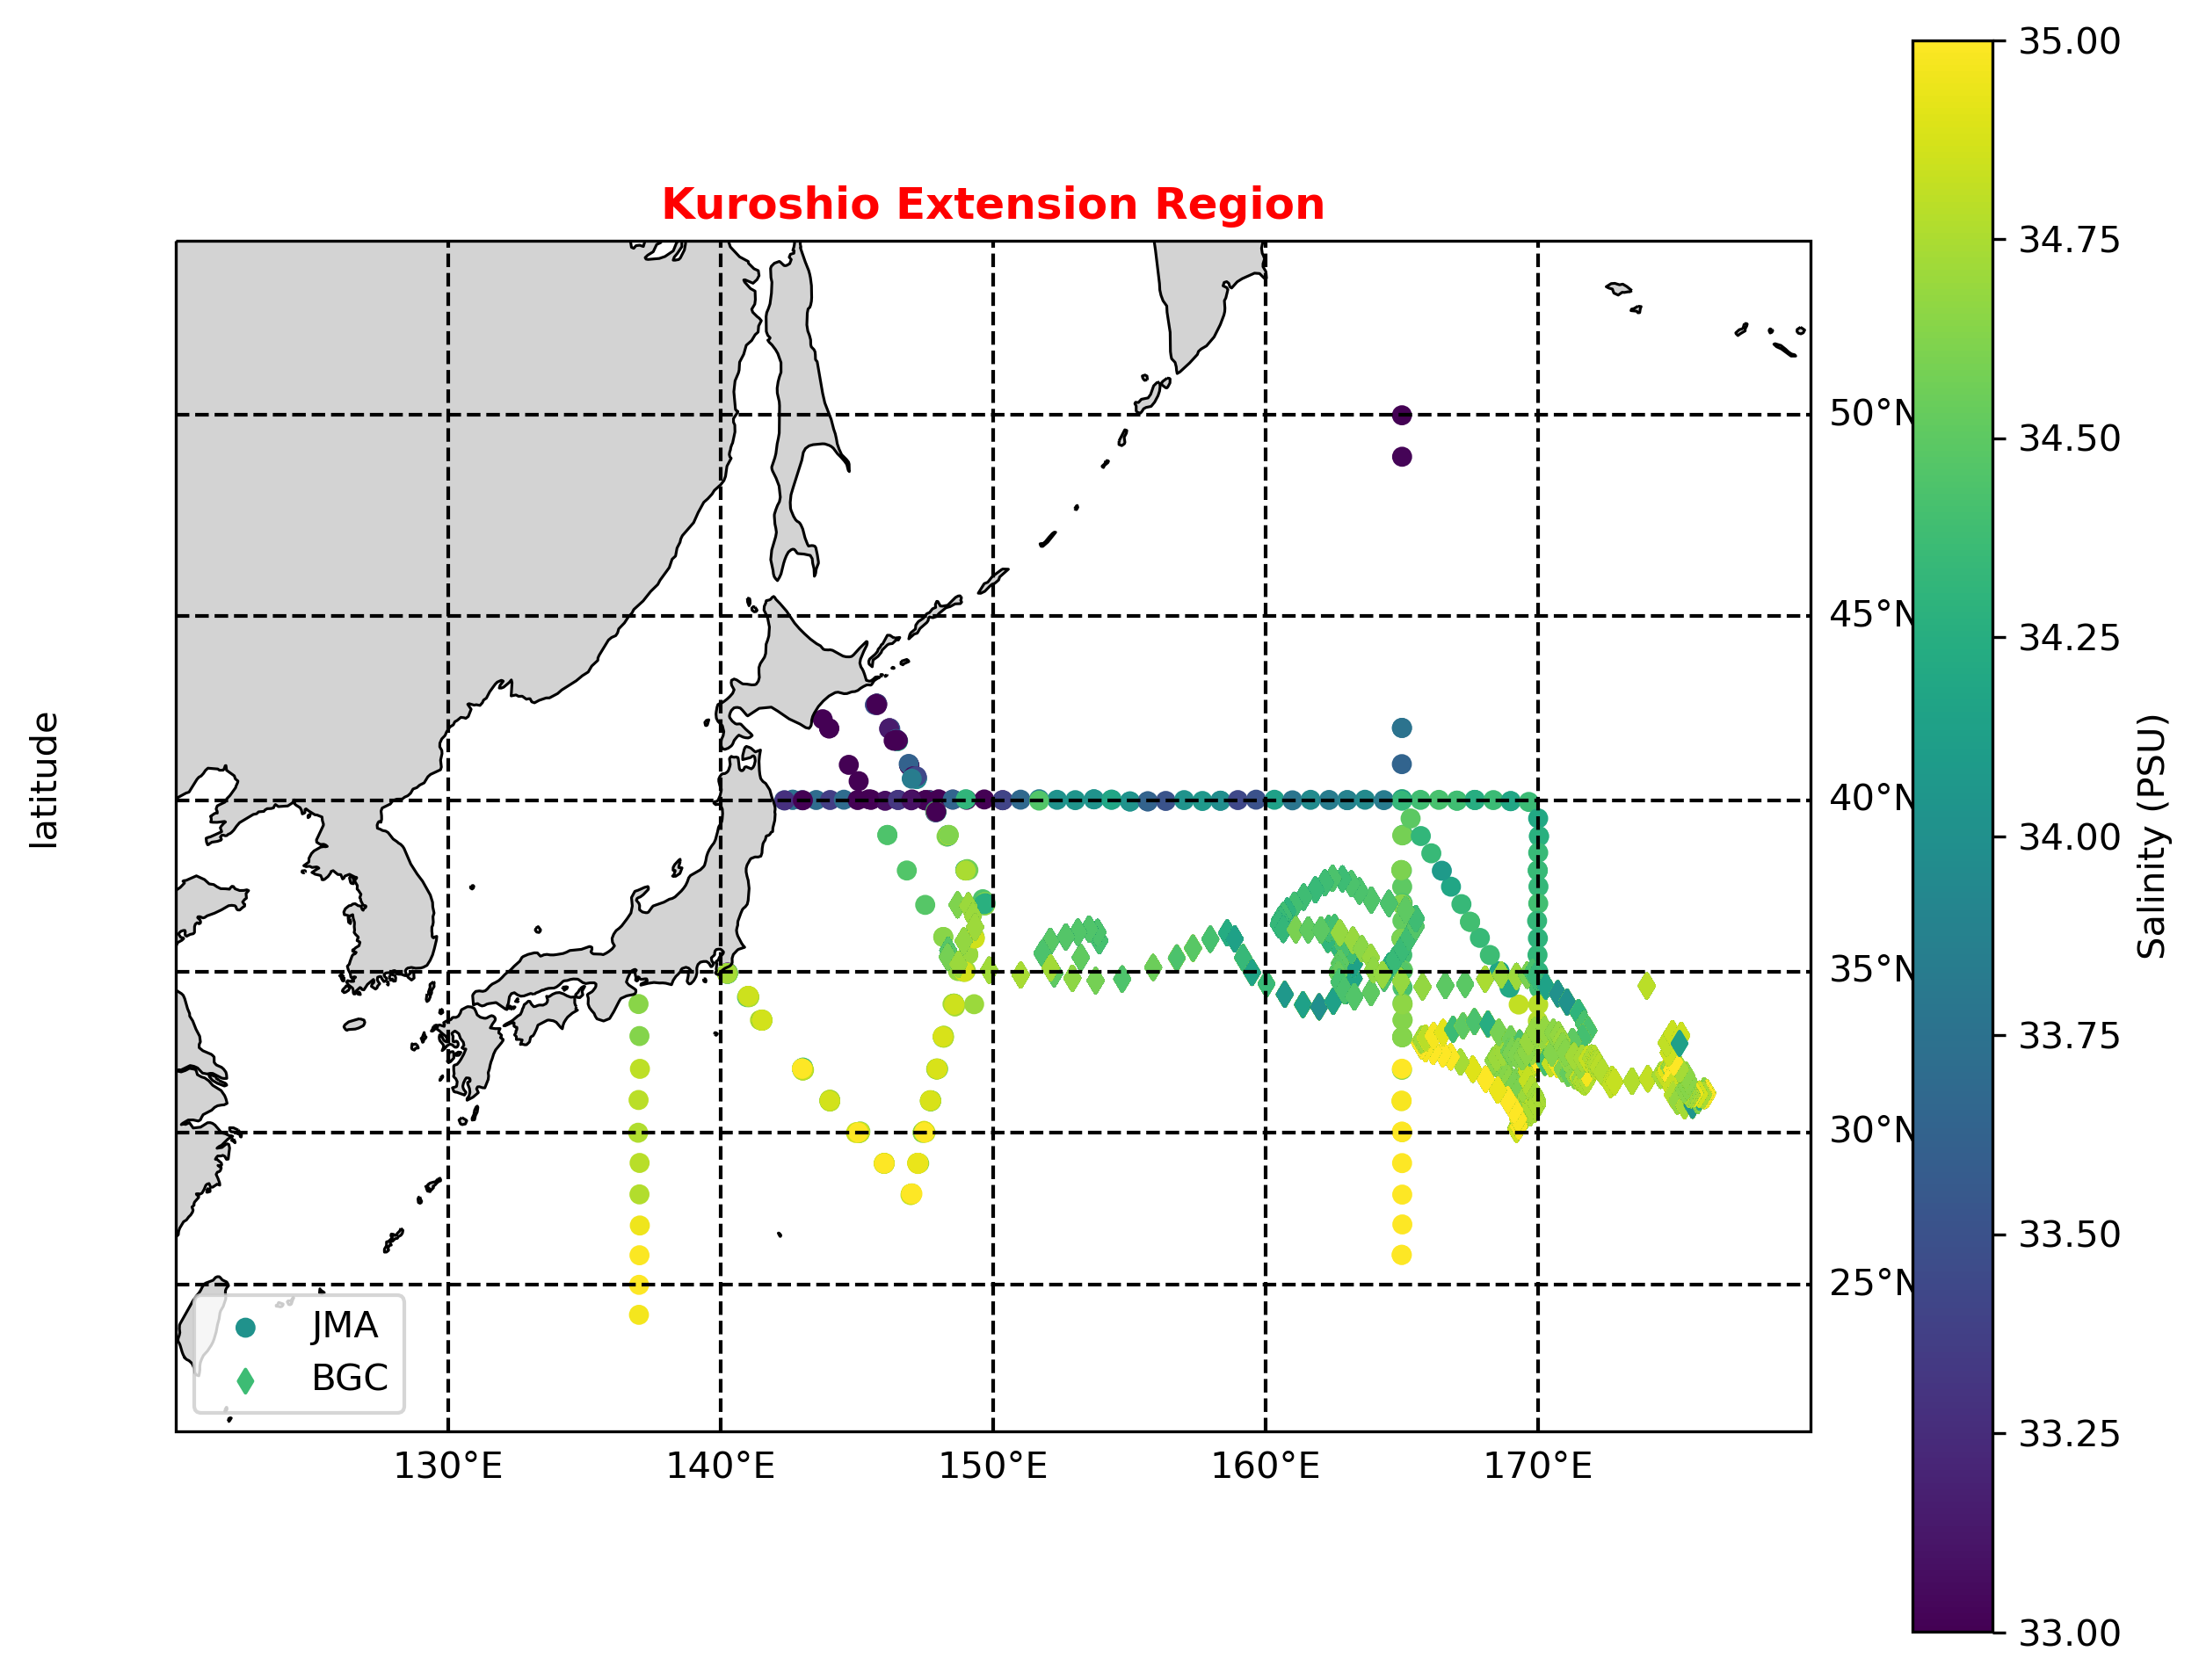

In [56]:
# create a regional map with parallels and meridians

fig = plt.figure(figsize = (10,8), dpi = 300)

ax = fig.add_subplot(1,1,1, projection = ccrs.Mercator(central_longitude = 0, min_latitude = 20, max_latitude = 55))

# (east, west, south, north) in terms of °E and °N
ax.set_extent([120, 180, 20, 50])

ax.coastlines(linewidth = 0.75, color = 'k')

ax.set_title('Kuroshio Extension Region', color = 'r', weight = 'bold')

# add lines of latitude 
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels = True, linewidth = 1, color = 'k', linestyle = '--')
gl.xlabels_top = False
gl.ylabels_left = False

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

gl.ylocator = mticker.FixedLocator([20, 25, 30, 35, 40, 45, 50, 55])

ax.add_feature(cp.feature.LAND, facecolor = 'lightgrey')

# if you want to add text axes labels
ax.text(-0.07, 0.55, 'latitude', va = 'bottom', ha = 'center', rotation = 'vertical', rotation_mode = 'anchor', transform = ax.transAxes)

nn = ax.scatter(jma_sub_ocean_10.lon, jma_sub_ocean_10.lat, s = 20, c = jma_sub_ocean_10.sal, marker = 'o', label = 'JMA', transform = ccrs.PlateCarree(), vmin=33, vmax=35)
nn = ax.scatter(subset2.LON, subset2.LAT, s = 20, c = bgc['SALINITY[PSS]'], marker = 'd', label = 'BGC', transform = ccrs.PlateCarree(), vmin=33, vmax=35)

cb = plt.colorbar(nn)
cb.set_label('Salinity (PSU)')
plt.legend(loc='lower left', fontsize = "medium")

## T-S diagram of JMA dataset

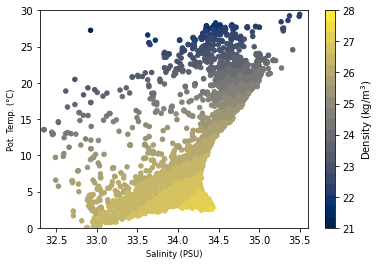

In [53]:
palette = plt.get_cmap('cividis', 20 )

mm = plt.scatter(jma_sub_ocean_1000.sal, jma_sub_ocean_1000.theta, s = 20, c = jma_sub_ocean_1000.density, marker = 'o', cmap = palette, vmin=21, vmax=28)
plt.axis([32.3, 35.6, 0, 30])
plt.ylabel('Pot. Temp. (°C)', fontsize = "small")
plt.xlabel('Salinity (PSU)', fontsize = "small")

cb = plt.colorbar(mm)
cb.set_label('Density (kg/m$^{3}$)')


## T-S digagram of BGC dataset

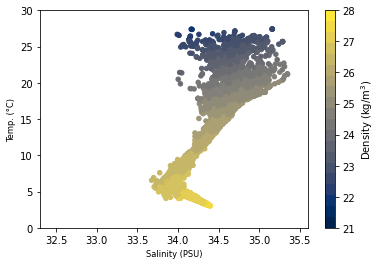

In [54]:
oo = plt.scatter(bgc['SALINITY[PSS]'], bgc['TEMPERATURE[C]'], s = 20, c = bgc['SIGMATHETA[KG/M3]'], marker = 'o', cmap = palette, vmin=21, vmax=28)
plt.axis([32.3, 35.6, 0, 30])
plt.ylabel('Temp. (°C)', fontsize = "small")
plt.xlabel('Salinity (PSU)', fontsize = "small")

cb = plt.colorbar(oo)
cb.set_label('Density (kg/m$^{3}$)')

* The BGC dataset covers a much more narrow range of salinity values than the JMA dataset.  However, to avoid over 'slicing' the data and incorporating too much bias (in my opinion), I will train the model with the JMA dataset that has already been sliced in depth and geographical extent as explained above.  

## Looking at seasonal coverage of both datasets using the surface subsets of both datasets

In [58]:
# import csv were date was split into month, day, and year

bgc_mod = pd.read_csv('C:/Users/nicol/OEAS_895/datasets/kuro_BGCargo_noNO3 - modified.csv')
print(bgc.columns)

# creating subsets for BGC dataset to just look at the SURFACE samples <10

subset2_mod = bgc_mod[(bgc['DEPTH[M]']<10)]

Index(['Date/GMT', 'Days since 1/1/1900', 'NITRATE[uMOL/KG]', 'DEPTH[M]',
       'PRESSURE[DBAR]', 'NA', 'SALINITY[PSS]', 'TEMPERATURE[C]',
       'SIGMATHETA[KG/M3]', 'OXYGEN[uMOL/KG]', 'OXYGENSAT', 'LON', 'LAT'],
      dtype='object')


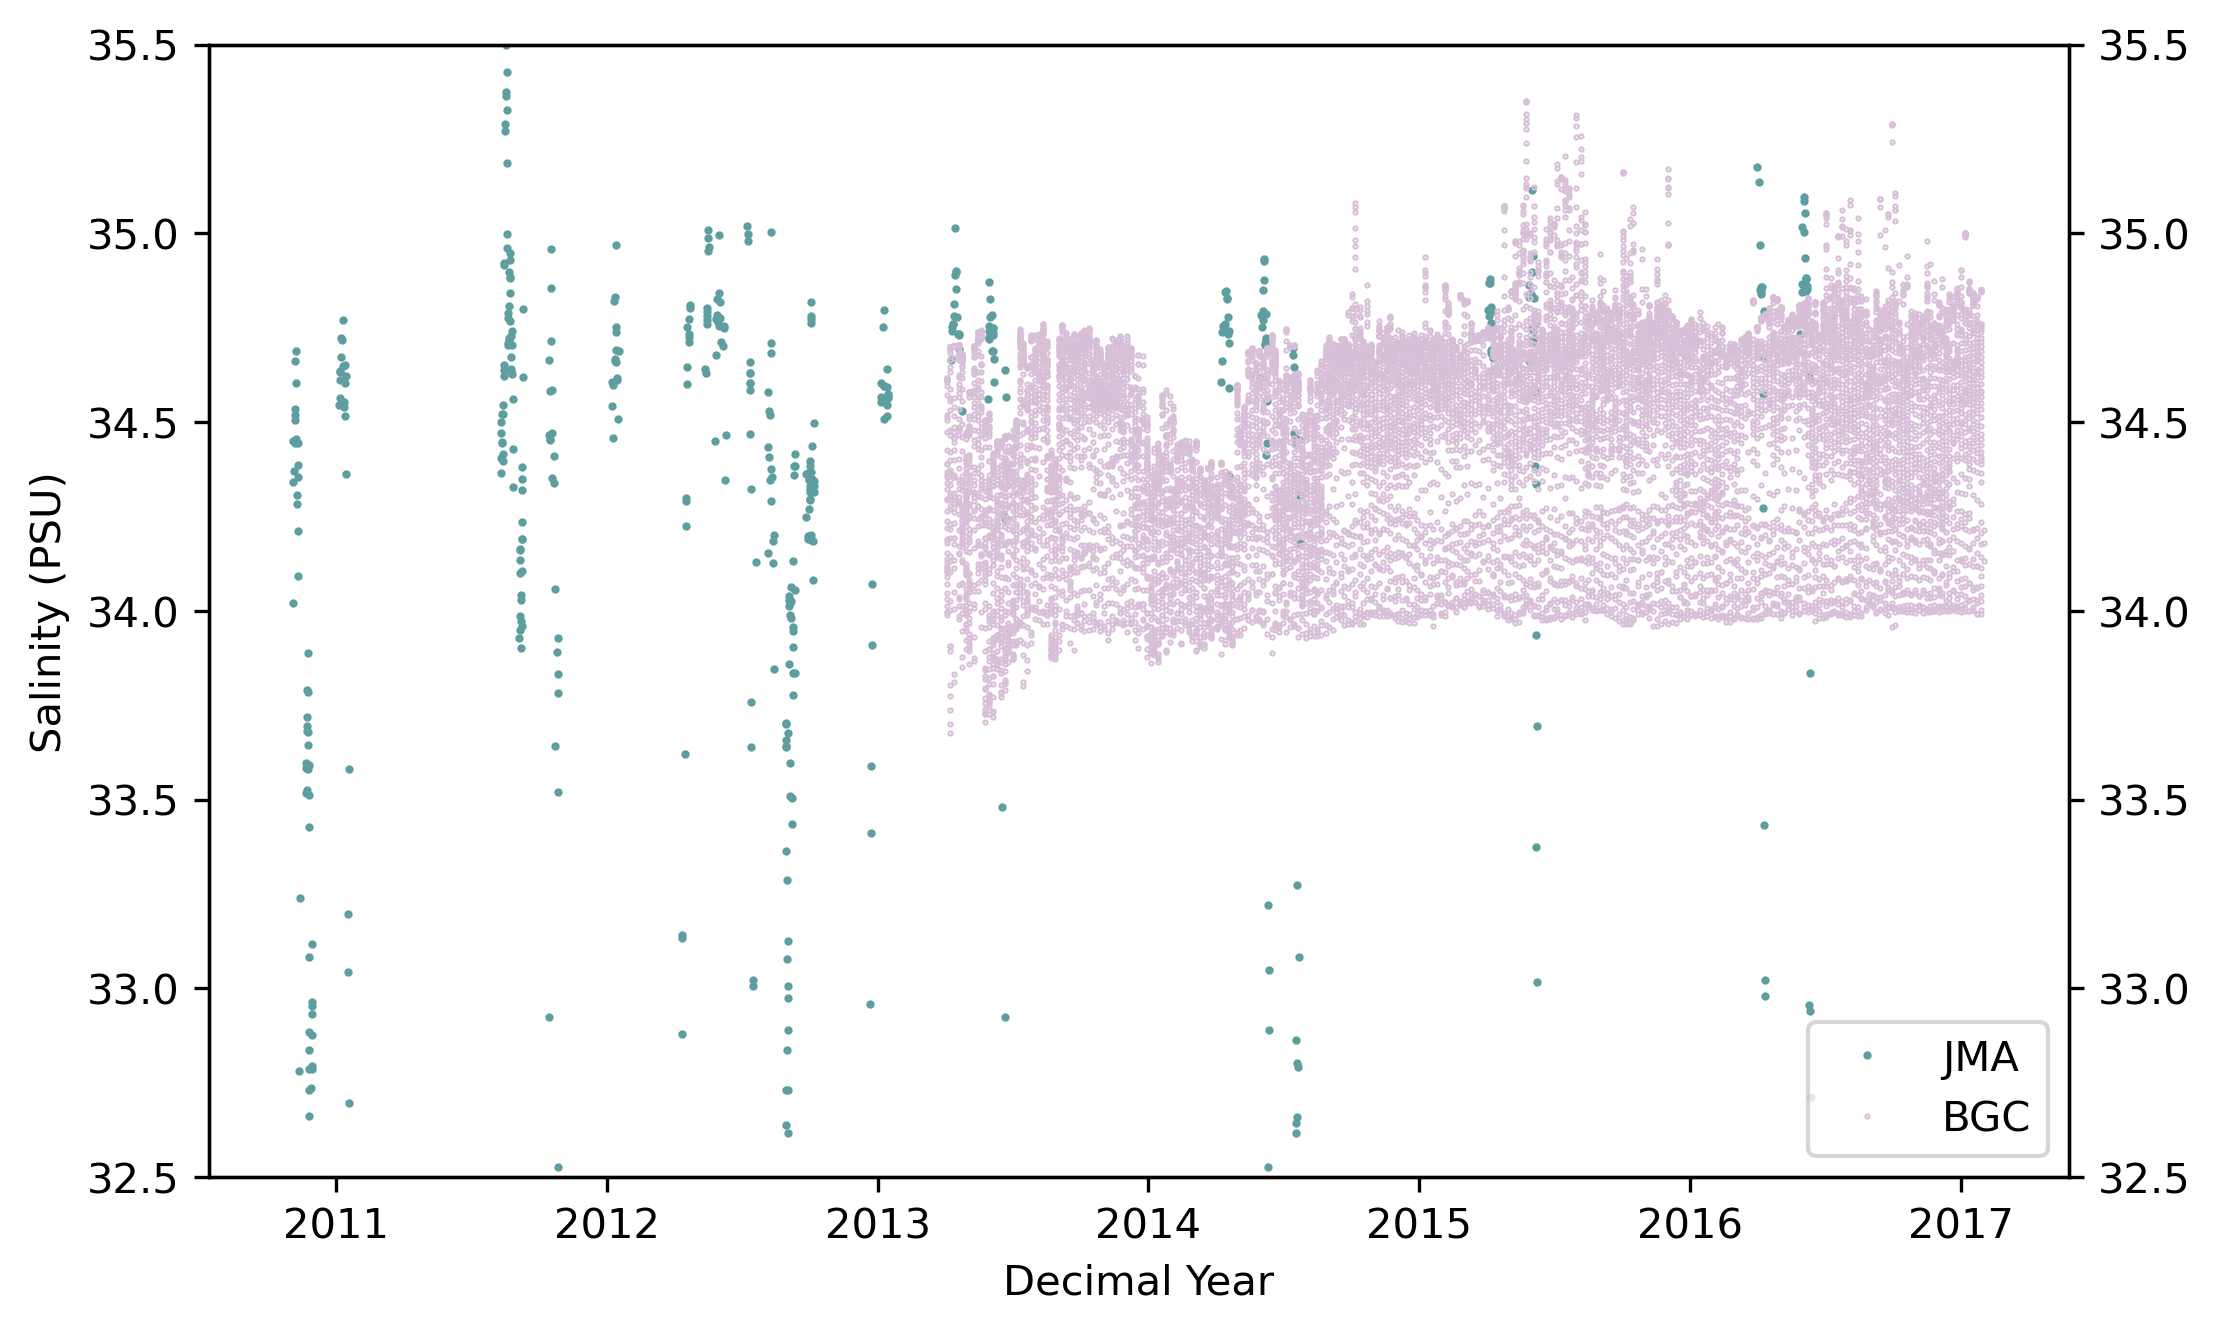

In [69]:
# subset is JMA surface
# subset2 is BGC surface

# calculate decimal year for both datasets

jma_dec_year = subset.year + subset.month/12 + subset.day/365
bgc_dec_year = subset2_mod.Year + subset2_mod.Month/12 + subset2_mod.Day/365


fig, ax1 = plt.subplots(figsize = (8,5), dpi = 300, sharex = 'all')
ax2 = ax1.twinx()

l1 = ax1.plot(jma_dec_year, subset.sal, 'o', c = 'cadetblue', markersize = 1 , markerfacecolor = 'none', label = 'JMA')
ax1.set_ylabel(r'Salinity (PSU)', color = 'k')
ax1.tick_params(axis='y', labelcolor = 'black')
ax1.set_xlabel('Decimal Year')
ax1.set_ylim([32.5, 35.5])

l2 = ax2.plot(bgc_dec_year, subset2_mod['SALINITY[PSS]'], 'o', c = 'thistle', markersize = 0.5 , markerfacecolor = 'none', label = 'BGC')
ax2.set_ylim([32.5, 35.5])
#ax2.set_ylabel(r'Salinity', color = 'red')
#ax2.tick_params(axis = 'y', labelcolor = 'red')


lns = l1 + l2
labs = [l.get_label() for l in lns]

ax1.legend(lns, labs, loc = 'lower right')

* Beacuse the BGC dataset is an argo float, it has full seasonal coverage beginning in the year 2013 and ending in 2017. 
* Whereas the JMA dataset is a cruise dataset and has coverage over the years from 2010 through 2016 during various months each year. 

# Describe each of the datasets that will be used in the model and tested. . . 

## JMA:

In [66]:
jma_sub_ocean_1000.describe()

,Unnamed: 0,theta,sal,depth,nitrate,lon,lat,year,month,day,profile,density
count,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000,7750.000000
mean,8980.404258,12.016624,34.328863,329.222839,16.369641,149.456370,34.772919,2012.618194,6.622710,12.521677,294.612774,25.705217
std,4655.796994,6.893880,0.428207,296.266778,15.354979,7.886909,4.394578,1.724967,2.953479,8.283762,147.924018,1.135076
min,0.000000,0.034400,32.349200,0.000000,0.000000,136.964167,23.997500,2010.000000,2.000000,1.000000,1.000000,20.989722
25%,5717.750000,4.849825,34.099800,76.000000,2.190000,145.709167,31.003167,2012.000000,4.000000,6.000000,191.250000,24.994475
50%,9382.500000,12.350500,34.344700,250.000000,11.260000,147.705833,34.242000,2012.000000,6.000000,11.000000,306.000000,25.868958
75%,12935.750000,17.731300,34.704450,600.000000,31.840000,149.283000,39.002833,2014.000000,9.000000,17.000000,419.000000,26.683150
max,16213.000000,29.454800,35.500300,1000.000000,45.180000,170.035167,49.991500,2016.000000,12.000000,31.000000,529.000000,27.327493


## BGC:

In [70]:
bgc.describe()

,Days since 1/1/1900,NITRATE[uMOL/KG],DEPTH[M],PRESSURE[DBAR],NA,SALINITY[PSS],TEMPERATURE[C],SIGMATHETA[KG/M3],OXYGEN[uMOL/KG],OXYGENSAT,LON,LAT
count,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,16136.000000,1.613600e+04,1.613600e+04,16136.000000,16136.000000
mean,42033.532222,11.367502,-276.153707,-278.469741,6.720191,34.476596,14.046241,25.635727,inf,inf,167.317041,33.298311
std,404.512161,13.206730,255.841439,258.212597,3.357582,0.267405,5.421896,0.922911,inf,inf,6.650333,1.943762
min,41335.568000,-6.050000,-990.493000,-999.800000,1.000000,33.675300,3.018000,21.966000,2.280000e+01,7.100000e+00,148.325000,30.092000
25%,41684.360000,1.950000,-348.988500,-351.730000,4.000000,34.271800,10.776225,25.184000,1.915000e+02,7.330000e+01,163.251000,31.765000
50%,42034.303000,6.570000,-200.253000,-201.765000,7.000000,34.537900,15.179800,25.601000,2.127000e+02,8.650000e+01,169.269000,32.565000
75%,42382.406000,15.090000,-76.392250,-76.947500,10.000000,34.688225,17.509325,26.225000,2.281000e+02,9.770000e+01,171.610000,34.901000
max,42736.536000,50.460000,-4.061000,-4.090000,12.000000,35.350200,27.426200,27.410000,1.790000e+308,1.790000e+308,176.199000,37.759000


* Both datasets have similar temperature ranges and means as one another (assuming potential temperature (theta) and temperature are similar. 
* Both datasets cover many years:  JMA 2010 - 2016 but with more seasonal gaps some years due to being a cruise whereas the BGC dataset was an argo float that had no seasonal gaps over all years and ran from 2013 to 2017. 
* The BGC dataset looks to be primarily composed of up to 3 different water masses in the upper 1000m. Whereas the JMA dataset had a much larger spatial coverage due to multiple cruises and encountered alot more water masses. 
* The BGC dataset also has better depth resolution since it is a float and the sensors can collect alot more data, compared to the JMA dataset which still has pretty good resolution but that dataset is likely from niskin bottles on a rosette. 
* Although the JMA dataset had a much larger depth range, the dataset was trimmed to match the 1000m depth range from the BGC argo float dataset. 